In [53]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Read in the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-06-06/owid-energy.csv'
owid_energy = pd.read_csv(url)

In [57]:
owid_energy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,NaN,NaN,NaN,NaN,21.693,...,0.136,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21886,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21887,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21888,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [55]:
# Data preprocessing
energy_tbl = owid_energy.loc[owid_energy['iso_code'] == 'USA', ['country', 'year', 'population', 'gdp',
                                                                'hydro_elec_per_capita', 'nuclear_elec_per_capita',
                                                                'solar_elec_per_capita', 'wind_elec_per_capita',
                                                                'low_carbon_elec_per_capita', 'biofuel_elec_per_capita',
                                                                'oil_elec_per_capita', 'gas_elec_per_capita',
                                                                'renewables_elec_per_capita']]

# Reshape the DataFrame using pd.melt
energy_tbl = pd.melt(energy_tbl, id_vars=['country', 'year', 'population', 'gdp'],
                     var_name='energy', value_name='output')


# Rename column names
energy_tbl['type'] = energy_tbl['energy'].replace({
    'hydro_elec_per_capita': 'Hydroelectric',
    'nuclear_elec_per_capita': 'Nuclear',
    'solar_elec_per_capita': 'Solar',
    'wind_elec_per_capita': 'Wind',
    'low_carbon_elec_per_capita': 'Low Carbon',
    'biofuel_elec_per_capita': 'Biofuel',
    'oil_elec_per_capita': 'Oil',
    'gas_elec_per_capita': 'Gas',
    'renewables_elec_per_capita': 'Renewables'
})

# Define a function to determine the 'highlight' column values


def highlight(x): return 'down' if x in [
    'Oil', 'Hydroelectric', 'Nuclear', 'Biofuel'] else 'up'


# Apply the lambda function to create a new 'highlight' column
energy_tbl['highlight'] = energy_tbl['type'].apply(highlight)

# Define the custom order
custom_order = ['Gas', 'Low Carbon', 'Renewables', 'Solar',
                'Wind', 'Biofuel', 'Nuclear', 'Hydroelectric', 'Oil']

# Convert 'type' to a categorical data type with custom order
energy_tbl['type'] = pd.Categorical(
    energy_tbl['type'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
energy_tbl = energy_tbl.sort_values(by='type')

# Delete rows with NaN values
energy_tbl.dropna(inplace=True)

# Filter rows where 'output' is greater than 0
energy_tbl = energy_tbl[energy_tbl['output'] > 0]

In [58]:
energy_tbl

,country,year,population,gdp,energy,output,type,highlight
944,United States,1990,248083728.0,9.250378e+12,gas_elec_per_capita,1615.675,Gas,up
943,United States,1989,244954096.0,9.091291e+12,gas_elec_per_capita,1547.926,Gas,up
942,United States,1988,242287808.0,8.787203e+12,gas_elec_per_capita,1121.925,Gas,up
941,United States,1987,239853168.0,8.432567e+12,gas_elec_per_capita,1222.167,Gas,up
940,United States,1986,237512784.0,8.146028e+12,gas_elec_per_capita,1125.048,Gas,up
...,...,...,...,...,...,...,...,...
829,United States,1997,272395424.0,1.139876e+13,oil_elec_per_capita,365.356,Oil,down
828,United States,1996,268984352.0,1.090917e+13,oil_elec_per_capita,325.443,Oil,down
827,United States,1995,265660560.0,1.051026e+13,oil_elec_per_capita,301.760,Oil,down
826,United States,1994,262273584.0,1.023202e+13,oil_elec_per_capita,434.173,Oil,down


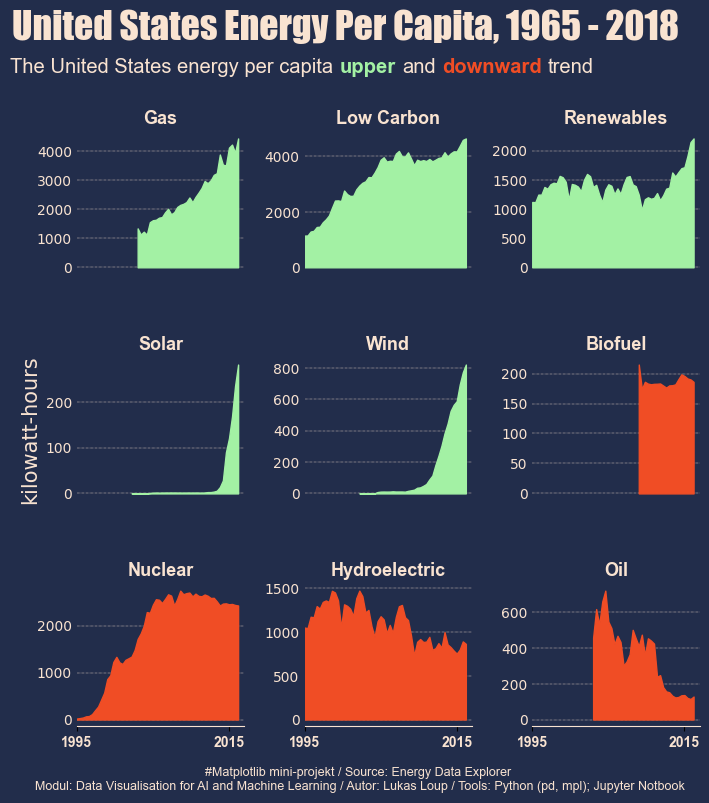

In [56]:
# ---- Create variables ---- #

# Color palette
bkg_col = '#222D4B'
title_col = "#F9E3D1"
subtitle_col = "#F9E3D1"
caption_col = "#F9E3D1"
text_col = "#F9E3D1"
palette = {'up': '#A3F1A4', 'down': '#F04D25'}

# Titel
title_text = 'United States Energy Per Capita, 1965 - 2018'
titel_sice = 27
titel_x_pos = 0.48
titel_y_pos = 1.1

# Subtitel
# Define formatted strings for up and down
up_list = ['upper', palette['up'], 'bold']
and_list = ['and', text_col, "normal"]
down_list = ['downward', palette['down'], 'bold']
end_list = ['trend', text_col, "normal"]
subtitle_list = ['The United States energy per capita', text_col, "normal"]
subtitle = [subtitle_list, up_list, and_list, down_list, end_list]

subtitle_size = 14.5

subtitle_x_pos = 0
subtitle_y_pos = 1.01

subtitle_pos = [subtitle_x_pos, subtitle_y_pos]


def get_distance_to_next_text(fig, fig_tex, spacing=0.009):
    # get text bounding box in figure coordinates
    renderer = fig.canvas.get_renderer()
    bbox_text = fig_tex.get_window_extent(renderer=renderer)

    # Get x0 and x1 values from the bounding box
    x0, _ = bbox_text.get_points()[0]
    x1, _ = bbox_text.get_points()[1]

    # Get the DPI (dots per inch) of the figure
    dpi = fig.get_dpi()

    # Calculate the distance to the next text based on x1, DPI, and figure width
    distance_to_next_text = (x1 / dpi) / fig.get_figwidth() + spacing

    return distance_to_next_text


# Description
descripion_text = f"#Matplotlib mini-projekt / Source: Energy Data Explorer \nModul: Data Visualisation for AI and Machine Learning / Autor: Lukas Loup / Tools: Python (pd, mpl); Jupyter Notbook"

descripion_x_pos = 0.5
descripion_y_pos = 0


# ---- Plot ----#

# Create subplots (3x3) using Axes (ax) for each 'type'
fig, axes = plt.subplots(3, 3, figsize=(7, 7), constrained_layout=True)

# Iterate over axes and energy types
for ax, energy_type in zip(axes.ravel(), energy_tbl['type'].unique()):

    # select data
    subset = energy_tbl[energy_tbl['type'] == energy_type]
    # sort data
    subset = subset.sort_values(by='year')

    # set x limits
    ax.set_xlim(1965, 2020)
    ax.set_xticks([])

    ax.fill_between(subset['year'], subset['output'],
                    color=palette[subset.highlight.unique()[0]], alpha=1)

    # Activate putting the grid in the background
    ax.set_axisbelow(True)

    ax.grid(axis='y', linestyle='-.', linewidth=0.3, color=text_col, zorder=0)

    # set subplot titel
    ax.set_title(energy_type, fontdict={
        'family': 'Arial', 'size': 13, 'weight': 'bold', 'color': text_col})

    # Disable the axis spines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ändern Sie die Farbe der Y-Achsenticks (Werte)  t
    ax.tick_params(axis='y', labelcolor=text_col,  length=0)

    # # adjust background color fig ax
    ax.set_facecolor(bkg_col)

    # "Describe the Y-axis.
    if energy_type == 'Solar':
        ax.set_ylabel('kilowatt-hours', fontsize=15, color=text_col, y=0.5)

    # Style the last three plots
    if ax in axes[2]:
        # Enabel axis spines for the last 3 ax
        ax.spines['bottom'].set_visible(True)
        # Set the color of the bottom spine
        ax.spines['bottom'].set_color(caption_col)
        # Set custom x-axis ticks at positions 1995 and 2015
        ax.set_xticks([1965, 2015])
        # Set custom x-axis tick labels for the specified positions
        ax.set_xticklabels(['1995', '2015'], fontdict={
                           'family': 'Arial', 'size': 10, 'weight': 'bold', 'color': text_col})


# adjust background color fig
fig.patch.set_facecolor(bkg_col)

fig.suptitle(title_text,  x=titel_x_pos, y=titel_y_pos, color=text_col,
             fontproperties={'family': 'Impact', 'size': titel_sice, 'weight': 'bold'})  # Die schrift 'fa6-brands' ist nich standartmäsig instaliert

# Create subtitle with multiple colors
for text_list in subtitle:
    fig_text = fig.text(subtitle_pos[0], subtitle_pos[1], text_list[0], color=text_list[1],
                        fontproperties={'family': 'Arial', 'size': subtitle_size, 'weight': text_list[2]})
    x = get_distance_to_next_text(
        fig, fig_text)
    subtitle_pos = [x, subtitle_pos[1]]


fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.3)
# fig.text(0.5, 0.5, text, fontsize=12, ha='center', va='center', transform=ax.transAxes)
fig.text(descripion_x_pos, descripion_y_pos, descripion_text, color=text_list[1], ha='center', va='center',
         fontproperties={'family': 'Arial', 'size': 9})

plt.show()